In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Rescaling, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import TrueNegatives, TruePositives, FalseNegatives, FalsePositives, binary_accuracy, Recall, AUC, BinaryAccuracy, Precision

In [ ]:
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/data/Brain_tumor'


batch_size = 64
img_height = 180
img_width = 180

In [ ]:
train_df = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    shuffle = True,
)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [ ]:
test_df = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [ ]:
val_df = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True,
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [ ]:
class_names = train_df.class_names
print(class_names)

['no', 'yes']


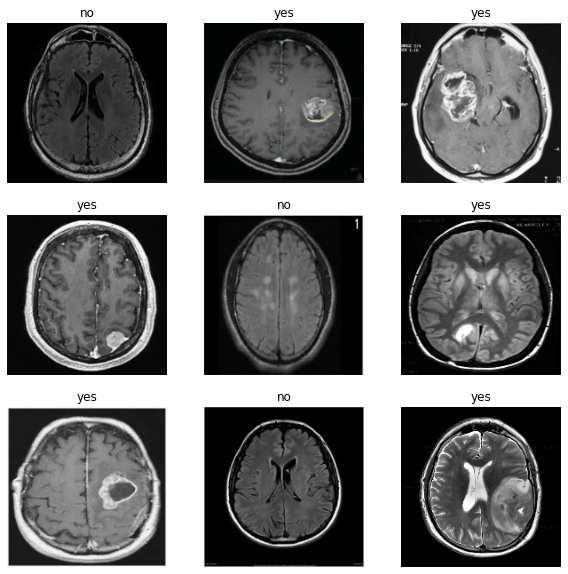

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_df:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 180, 180, 3)
(64,)


In [ ]:
train_df

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
metrics = [
    TruePositives(name='tp'),
    FalsePositives(name='fp'),
    TrueNegatives(name='tn'),
    FalseNegatives(name='fn'), 
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='auc'),

]

In [ ]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(3,3), strides=1, activation='relu',input_shape=(img_height,img_width, 3)),
    MaxPool2D(pool_size=(3,3)),
    
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(3,3)),
    
    Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'),
    Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'),
    MaxPool2D(pool_size=(3,3)),

    
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.25),
    Dense(1,activation='sigmoid')
    
])

In [ ]:
model.compile(optimizer = 'adam',
                loss = "binary_crossentropy",
                metrics=metrics)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        1

In [ ]:
history = model.fit(train_df, epochs=100,validation_data=val_df,)

Epoch 1/100
4/4 [==============================] - 32s 7s/step - loss: 7.8095 - tp: 77.0000 - fp: 54.0000 - tn: 26.0000 - fn: 46.0000 - accuracy: 0.5074 - precision: 0.5878 - recall: 0.6260 - auc: 0.4167 - val_loss: 1.0948 - val_tp: 9.0000 - val_fp: 6.0000 - val_tn: 12.0000 - val_fn: 23.0000 - val_accuracy: 0.4200 - val_precision: 0.6000 - val_recall: 0.2812 - val_auc: 0.3707
Epoch 2/100
4/4 [==============================] - 21s 5s/step - loss: 1.4592 - tp: 95.0000 - fp: 58.0000 - tn: 22.0000 - fn: 28.0000 - accuracy: 0.5764 - precision: 0.6209 - recall: 0.7724 - auc: 0.5261 - val_loss: 1.4573 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 17.0000 - val_fn: 31.0000 - val_accuracy: 0.3600 - val_precision: 0.5000 - val_recall: 0.0312 - val_auc: 0.6840
Epoch 3/100
4/4 [==============================] - 20s 5s/step - loss: 0.8685 - tp: 56.0000 - fp: 20.0000 - tn: 60.0000 - fn: 67.0000 - accuracy: 0.5714 - precision: 0.7368 - recall: 0.4553 - auc: 0.6583 - val_loss: 0.8150 - val_tp: 11.0000 -

In [ ]:
validation_results = model.evaluate(test_df, verbose=0)

for name, value in zip(model.metrics_names, validation_results):
  print(name, ': ', value)

loss :  2.1989755630493164
tp :  27.0
fp :  6.0
tn :  12.0
fn :  5.0
accuracy :  0.7799999713897705
precision :  0.8181818127632141
recall :  0.84375
auc :  0.8098958730697632
